In [16]:
import pandas as pd
from textblob import TextBlob
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sbn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk


In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

verilerin olduğu dosya yüklendi

In [18]:
dataFrame = pd.read_excel("/content/bolgesel_sikayet.xlsx")

In [19]:
x= dataFrame.head();

In [20]:
x

Zaman damgası gender  age     location  \
0 2024-08-05 09:36:25.271  Kadın   20      Yakınca   
1 2024-08-05 09:55:36.059  Kadın   36     çırmıhtı   
2 2024-08-05 10:10:43.377  Kadın   39   Yeşilyurt    
3 2024-08-05 10:29:20.935  Erkek   21  Battalgazi    
4 2024-08-05 10:52:53.138  Kadın   16   yakınkent    

                     complaint_type  \
0                           Altyapı   
1  Trafik, Ulaşım, Sosyal Hizmetler   
2                             Çevre   
3                 Altyapı, Güvenlik   
4                            Ulaşım   

                                           complaint  
0                   Sık yaşanan elektrik kesintileri  
1  Trafik düzeni yetersiz  Yeşilyurt merkez meyda...  
2  Park yerleri cok pis sokak köpekleri korku ver...  
3  İnternet alt yapısı oldukça kötü, güvenlik kon...  
4                 Otobüs çok erken saatlerde bitiyor

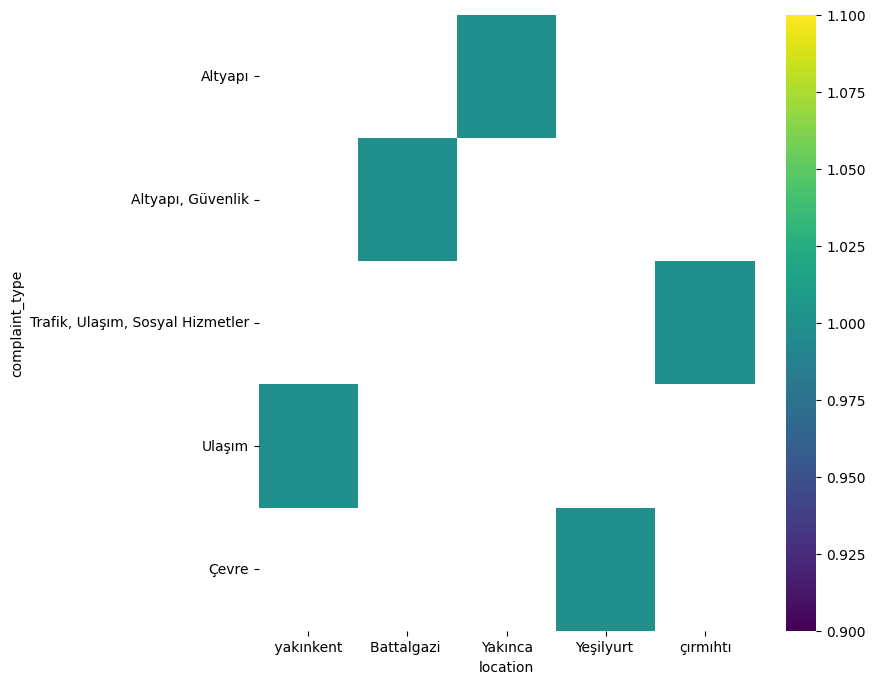

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['complaint_type'].value_counts()
    for x_label, grp in x.groupby('location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('location')
_ = plt.ylabel('complaint_type')

<ipython-input-23-557ff0428077>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x, x='age', y='gender', inner='stick', palette='Dark2')


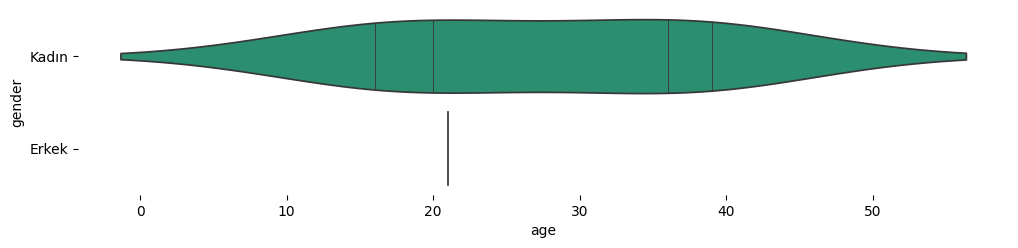

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(x['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x, x='age', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

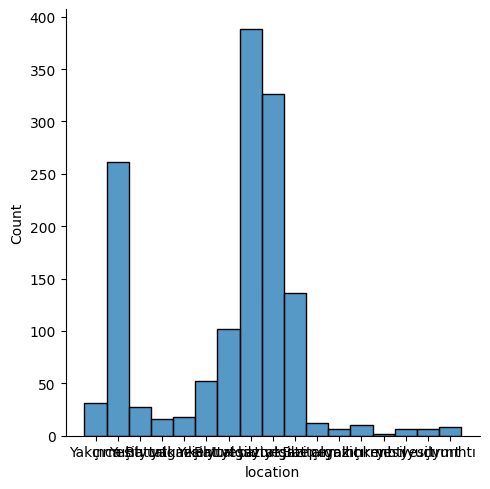

In [ ]:
sbn.displot(dataFrame["location"])

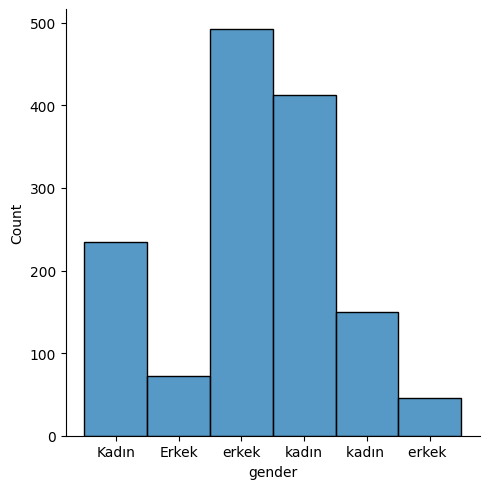

In [ ]:
sbn.displot(dataFrame["gender"])

projede kullanmayacağımız kolonları silelim

In [22]:
dataFrame = dataFrame.drop(['Zaman damgası', 'gender', 'age'], axis=1)

In [23]:
# location, complaint_type ve complaint sütunlarına göre gruplama
grouped = dataFrame.groupby(['location', 'complaint_type']).agg({
    'complaint': 'count'  # Her bir şikayet türü için sayım yap
}).reset_index()

In [24]:
# Gruplama sonucu
grouped.rename(columns={'complaint': 'complaint_count'}, inplace=True)

In [25]:
# En çok şikayet gelen türleri
top_complaints = grouped.loc[grouped.groupby('location')['complaint_count'].idxmax()]

print(top_complaints)

        location                    complaint_type  complaint_count
0    Battalgazi                  Altyapı, Güvenlik               12
1     yakınkent                             Ulaşım               18
2      yesilyurt                  Sosyal Hizmetler                6
3      çırmıhtı   Trafik, Ulaşım, Sosyal Hizmetler                8
4     Battalgazi                           altyapı              102
5    Battalgazi                  Altyapı, Güvenlik               16
6        Yakınca                           Altyapı               31
7      Yeşilyurt                          Güvenlik               28
10    Yeşilyurt                              Çevre               27
13    battalgazi                          ücretler              198
14    yakınkent                             Ulaşım               10
15     yesilyurt                  Sosyal Hizmetler                6
16     yeşiltepe                          güvenlik               72
18     yeşilyurt                           altya

In [39]:
dataFrame['complaint_type'] = dataFrame['complaint_type'].str.lower()
dataFrame['location'] = dataFrame['location'].str.lower()

In [40]:
result = dataFrame.groupby(['location', 'complaint_type']).size().reset_index(name='count')


In [41]:
top_complaints = result.loc[result.groupby('location')['count'].idxmax()]


In [42]:
print(top_complaints)

        location                    complaint_type  count
0    battalgazi                  altyapı, güvenlik     12
1     yakınkent                             ulaşım     18
2      yesilyurt                  sosyal hizmetler      6
3      çırmıhtı   trafik, ulaşım, sosyal hizmetler      8
6     battalgazi                          ücretler    198
7    battalgazi                  altyapı, güvenlik     16
8        yakınca                           altyapı     31
9     yakınkent                             ulaşım     10
10     yesilyurt                  sosyal hizmetler      6
11     yeşiltepe                          güvenlik     72
13     yeşilyurt                           altyapı    192
18    yeşilyurt                              çevre     27
20      çırmıhtı                            trafik    148
22     çırmıhtı   trafik, ulaşım, sosyal hizmetler      6
23    çırmıhtı    trafik, ulaşım, sosyal hizmetler      2


In [43]:
dataFrame['location'] = dataFrame['location'].replace('yeşilyurt', 'yesilyurt')


In [29]:
dataFrame.head()

location                    complaint_type  \
0      yakınca                           altyapı   
1     çırmıhtı  trafik, ulaşım, sosyal hizmetler   
2   yeşilyurt                              çevre   
3  battalgazi                  altyapı, güvenlik   
4   yakınkent                             ulaşım   

                                           complaint  
0                   Sık yaşanan elektrik kesintileri  
1  Trafik düzeni yetersiz  Yeşilyurt merkez meyda...  
2  Park yerleri cok pis sokak köpekleri korku ver...  
3  İnternet alt yapısı oldukça kötü, güvenlik kon...  
4                 Otobüs çok erken saatlerde bitiyor

In [44]:
print(dataFrame['location'].unique())

['yakınca' 'çırmıhtı' 'yeşilyurt ' 'battalgazi ' ' yakınkent ' 'yesilyurt'
 'battalgazi' 'yeşiltepe' ' battalgazi ' 'çırmıhtı ' 'yakınkent '
 'çırmıhtı  ' ' yesilyurt' ' çırmıhtı ']


lokasyonlara göre şikayetlerin yoğunluğu

<Axes: xlabel='location', ylabel='complaint'>

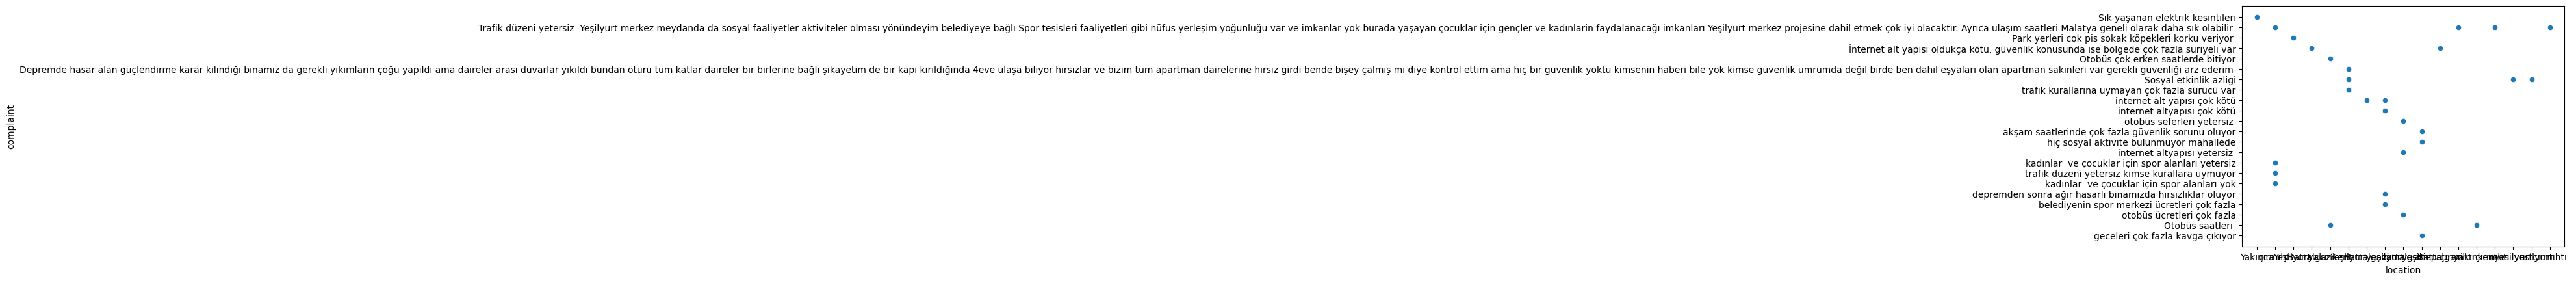

In [ ]:
sbn.scatterplot(x="location",y="complaint" , data=dataFrame)

verileri düzenlemeye başlayalım

In [31]:
import pandas as pd
from textblob import TextBlob


In [32]:
dataFrame = pd.read_excel("/content/bolgesel_sikayet.xlsx")

In [33]:
dataFrame = dataFrame.drop(['Zaman damgası', 'gender', 'age'], axis=1)

In [34]:
dataFrame['location'] = dataFrame['location'].str.lower()
dataFrame['complaint_type'] = dataFrame['complaint_type'].str.lower()

In [37]:
dataFrame['complaint'].iloc[:10] = dataFrame['complaint'].iloc[:10].apply(correct_spelling)


In [38]:
print(dataFrame['complaint'].iloc[:10])

0                     Ask yaşanan electric kesintileri
1    Trafik dozen yetersiz  Yeşilyurt marked meydan...
2     Dark yerleri co his soak köpekleri work veriyor 
3    Internet at yapısı oldukça kit, güvenlik konus...
4                     Otobüs ok even saatlerde bitiyor
5    Depremde has alan güçlendirme karay kılındığı ...
6                                 Royal etkinlik align
7         train kurallarına uymayan ok fall sürücü war
8                            internet at yapısı ok kit
9                            internet at yapısı ok kit
Name: complaint, dtype: object


In [45]:
dataFrame['location'] = dataFrame['location'].str.replace('yeşilyurt', 'yesilyurt', case=False)


In [46]:
print(dataFrame['location'].unique())

['yakınca' 'çırmıhtı' 'yesilyurt ' 'battalgazi ' ' yakınkent ' 'yesilyurt'
 'battalgazi' 'yeşiltepe' ' battalgazi ' 'çırmıhtı ' 'yakınkent '
 'çırmıhtı  ' ' yesilyurt' ' çırmıhtı ']


In [47]:
# 'location' ve 'complaint_type' sütunlarına göre gruplama ve sayma
complaint_summary = dataFrame.groupby(['location', 'complaint_type']).size().reset_index(name='count')

# Sonucu yazdırma
print(complaint_summary)


        location                    complaint_type  count
0    battalgazi                  altyapı, güvenlik     12
1     yakınkent                             ulaşım     18
2      yesilyurt                  sosyal hizmetler      6
3      çırmıhtı   trafik, ulaşım, sosyal hizmetler      8
4     battalgazi                           altyapı    166
5     battalgazi                            ulaşım     64
6     battalgazi                          ücretler    198
7    battalgazi                  altyapı, güvenlik     16
8        yakınca                           altyapı     31
9     yakınkent                             ulaşım     10
10     yesilyurt                           altyapı    192
11     yesilyurt                          güvenlik    136
12     yesilyurt                  sosyal hizmetler     14
13     yesilyurt                   trafik,güvenlik     16
14     yesilyurt                          ücretler     88
15    yesilyurt                              çevre     27
16     yeşilte